In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import rfftn, fftfreq, rfftfreq

In [2]:
#box size in Mpc
L=2688 #preso dal sito e dipende dalla simulazione
volume=L**3

#create the particles
x,y,z = np.genfromtxt('cluster2.txt', usecols=(1,2,3), unpack=True)/1000
mass=np.genfromtxt('cluster2.txt', usecols=(7), unpack=True) #in Msol/h
#number of points
n_points=len(x)
density=n_points/volume

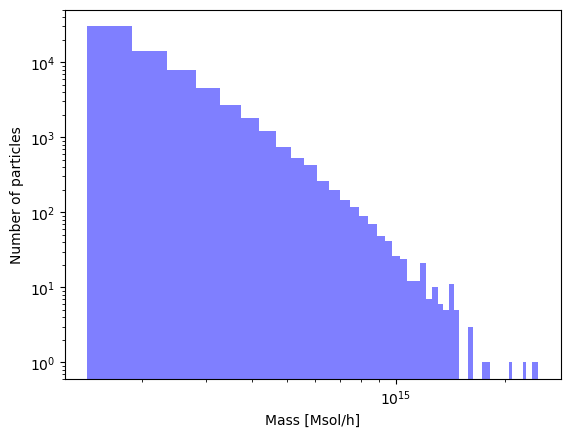

In [3]:
plt.hist(mass, bins=50, alpha=0.5, color='blue', label='mass')
plt.xlabel('Mass [Msol/h]')
plt.ylabel('Number of particles')
plt.xscale('log')
plt.yscale('log')

In [4]:
#create the density in the grid
n_cells = 64
cell_side=L/n_cells

#compute the mean density in the cell
cell_mean_density = n_points/n_cells**3

#create the grid with his histogramm
grid, edges=np.histogramdd((x, y, z), bins=(n_cells,n_cells,n_cells), range=((0,L),(0,L),(0,L)))
density_field=(grid-cell_mean_density)/cell_mean_density

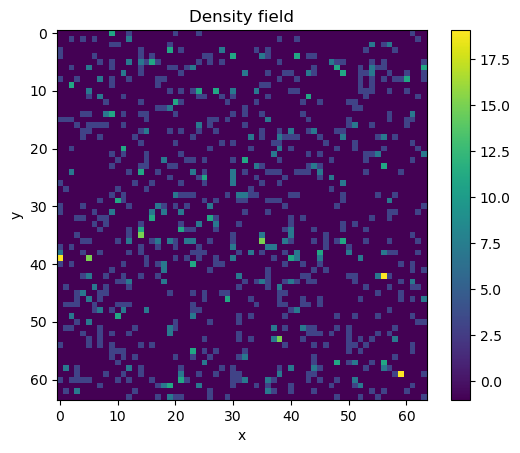

In [5]:
cb=plt.imshow(density_field[:,:,0], )
plt.colorbar(cb)
plt.title("Density field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
#compute the delta in fourier space
delta_k = rfftn(density_field)/n_cells**3


In [7]:
#create the k grid
kF=2*np.pi/L
H=L/n_cells
kN=np.pi/H
kx=fftfreq(n_cells, d=1/n_cells)*kF
ky=fftfreq(n_cells, d=1/n_cells)*kF
kz=rfftfreq(n_cells, d=1/n_cells)*kF


In [8]:
KX, KY, KZ = np.meshgrid(kx, ky, kz)
KK=np.sqrt(KX**2 + KY**2 + KZ**2)

In [9]:
pk_grid=delta_k*np.conjugate(delta_k)*volume

In [10]:
#Binning
c=1
k_edges=np.arange(kF,kN,c*kF)
k_bins=0.5*(k_edges[1:]+k_edges[:-1])


/Users/pietromongiardini/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/pietromongiardini/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


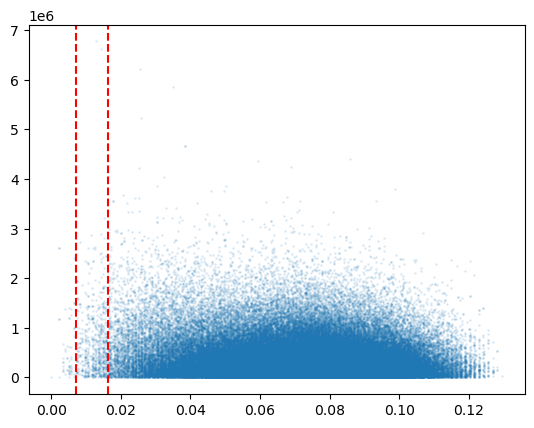

In [11]:
plt.plot(KK.flatten(), pk_grid.flatten(), 'o', markersize=1, alpha=0.1)
plt.axvline(k_edges[2], color='r', linestyle='--', label='k bins')
plt.axvline(k_edges[6], color='r', linestyle='--', label='k bins')

In [12]:
pk_average=np.zeros(k_bins.shape)
k_average=np.zeros(k_bins.shape)

for i in range(len(k_bins)):
    mask=(KK.flatten() > k_edges[i]) & (KK.flatten() < k_edges[i+1])
    pk_average[i]=np.mean(pk_grid.flatten()[mask].real)
    k_average[i]=np.mean(KK.flatten()[mask])
    print(k_average[i], pk_average[i])

0.0035533640796179037 411638.6697722159
0.005700784360095065 551640.3674318702
0.008172820569802518 686036.7924252558
0.010505623637017802 699230.1235270498
0.012860071425811033 595804.8454135136
0.015230047891272757 715249.8212125433
0.017464716655566766 650214.5027149927
0.019750449466914784 621529.2841676936
0.022235712673843 642432.0965697778
0.024501886853690768 574068.3847604196
0.0268168449742968 560904.9639735152
0.029175364062967224 545827.7767615445
0.03156963083224364 533525.4668573443
0.03386273590620053 500755.69596576504
0.036210659394780124 501000.6482637825
0.03851763910205504 464788.5189032614
0.04085692916681938 457844.2145271425
0.043196339212522264 456733.95139489614
0.0455581285592049 427466.39793915465
0.047876467768544984 436836.2856737997
0.05022855265521479 418251.5024593708
0.05255466176249511 412247.550349556
0.05489878154704593 393207.7638173863
0.057217253122645105 396608.9406525029
0.05957845803578802 398271.89433170937
0.06191428622522097 394781.184063131

Text(0, 0.5, 'pk [Mpc**3/h**3]')

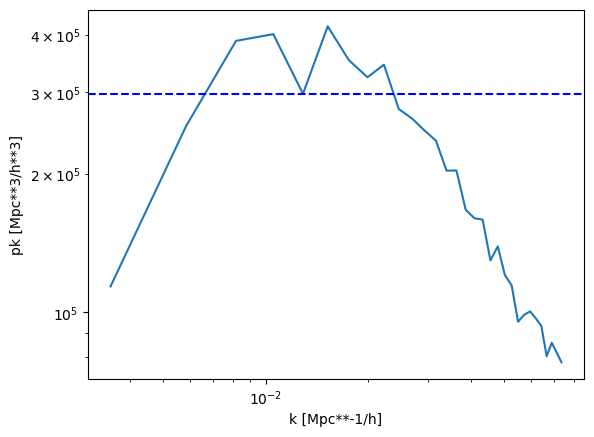

In [13]:
plt.loglog(k_bins, pk_average-1./density, '-', markersize=5, label='pk average')
plt.axhline(1./density, color='b', linestyle='--', label='k bins')
plt.xlabel("k [Mpc**-1/h]")
plt.ylabel("pk [Mpc**3/h**3]")

name: Magneticum_Box0_mr
code: Gadget3_LT12_BH14_C20 # LT with 12 elements, BH als Hirschmann 2014, Conduction 1/20th
size_mph: 2688              # Mpc/h
n_particles: 2x4536^3       # number of particles in initial conditions
nfiles: 6144                # number of files the snapshot is splitted into
mdm_msun: 1.3e10            # mass dark matter particles, in msun/h
mgas_msun: 2.6e9            # mass gas particle, in msun/h
epsilon_dm: 10.0            # softening of dark matter
epsilon_gas: 10.0           # softening of dark matter
epsilon_stars: 5.0          # softening of stars particles, in msun
f_bary: 16.8                # fraction of baryons
omega_m: 0.272              # total matter content
omega_lambda: 0.728         # Cosmological constant 
hubble: 70.4                # Hubble constant
sigma_8: 0.809              # Normalization of matter powerspectrum
n_primordial: 0.963         # Primordial power spectrum index 

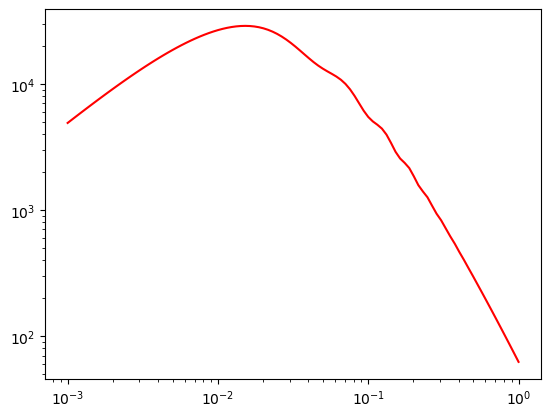

In [14]:
import camb

camb_params = camb.CAMBparams()
h=0.704
ombh2=0.022
omega_m=0.272
omch2=omega_m * h**2 - ombh2
# Set the parameters for the CAMB run
camb_params.set_cosmology(H0=70.4, ombh2=0.022, omch2=omch2, mnu=0, num_massive_neutrinos=0 )
camb_params.InitPower.set_params(ns=0.963)
camb_params.set_matter_power(redshifts=[0.,], kmax=1.0)
camb_results = camb.get_results(camb_params)
k, z, pk=camb_results.get_matter_power_spectrum(minkh=0.001, maxkh=1.0)
sigma8_z0=camb_results.get_sigma8_0()

pk_renorm=pk[0]*(0.809)**2/sigma8_z0**2
plt.loglog(k, pk_renorm, 'r-', label='CAMB')


Text(0, 0.5, 'pk [Mpc**3/h**3]')

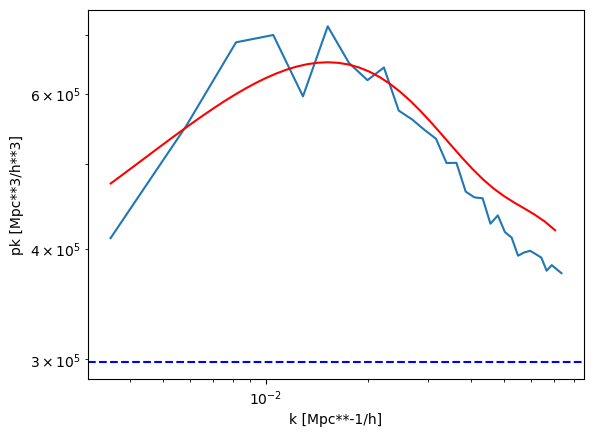

In [15]:
b=3.5
plt.loglog(k_bins, pk_average, '-', markersize=5, label='pk average')
plt.loglog(k[(k>k_bins[0])&(k<k_bins[-1])],b**2 * pk_renorm[(k>k_bins[0])&(k<k_bins[-1])]+1./density, 'r-', label='CAMB')
plt.axhline(1./density, color='b', linestyle='--', label='k bins')
plt.xlabel("k [Mpc**-1/h]")
plt.ylabel("pk [Mpc**3/h**3]")